# Week 1: Introduction to TensorFlow

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

TensorFlow is a library (usually used with Python) developed by Google Brain for training and running statistical machine learning models.
It is extremely flexible, making almost no assumptions about your model except that you can represent it as a graph of math operations.
As a result, it sees lots of use in developing new machine learning models, as well as efficiently training and running existing models.

Advantages of TensorFlow over other frameworks:
 - Most flexible by far -- can use basically any differentiable equation as a model
 - Most popular and heavily-developed framework by far, used by numerous companies
 - Works well with CPUs, GPUs, and TPUs (Tensor Processsing Units), and across lots of devices, including distributed training
 - Incredible debugging and visualization utilities (TensorBoard and tfdbg)
 - Graph compilation can optimize your code for you
 - Gives you lots of control over hardware (e.g. whether variables live in CPU or GPU memory)
 - Open-source!

Disadvantages:
 - Graph programming unfamiliar to many people
 - Hard to search documentation, lots of deprecated and soon-to-be-deprecated APIs (with TensorFlow 2.0, this will hopefully change)
 - Generally more verbose and difficult to develop models (but we will also learn Keras, a library meant to make building common models in TensorFlow very simple)
 - Can be slower than other frameworks for certain models (Apache MXNET)
 - TensorFlow itself doesn't support every kind of statistical model, most notably "graphical models" associated with Bayesian statistics (although, see [bayesflow](https://www.tensorflow.org/api_docs/python/tf/contrib/bayesflow)) 

# Why care?

Because it lets you do all of the awesome things machine learning can do:
 - [Translate between any two human languages](https://code.fb.com/ai-research/laser-multilingual-sentence-embeddings/)
 - [Play games with superhuman skill](https://deepmind.com/blog/alphazero-shedding-new-light-grand-games-chess-shogi-and-go/)
 - [Make a picture look like it was painted by Picasso](http://genekogan.com/works/style-transfer/)
 - [Generate realistic human faces](https://blog.openai.com/glow/) 
 - [See through walls with WiFi](https://news.mit.edu/2018/artificial-intelligence-senses-people-through-walls-0612)
 - [Have your phone make calls for you](https://ai.googleblog.com/2018/05/duplex-ai-system-for-natural-conversation.html)
 - [Find every tree in the world (shameless self-plug)](https://medium.com/descarteslabs-team/descartes-labs-urban-trees-tree-canopy-mapping-3b6c85c5c9cc)
 * ...
 
 For example, the people in these pictures never existed but were synthesized by a neural network:
![Faces generated by neural network](https://research.nvidia.com/sites/default/files/publications/representative_image_512x256.png)
(Image credit: [Nvidia Research, Progressive Growing of GANs for Improved Quality, Stability, and Variation](https://research.nvidia.com/publication/2017-10_Progressive-Growing-of))

# Overview of TensorFlow API levels
![tensorflow api levels](https://3.bp.blogspot.com/-l2UT45WGdyw/Wbe7au1nfwI/AAAAAAAAD1I/GeQcQUUWezIiaFFRCiMILlX2EYdG49C0wCLcBGAs/s1600/image6.png)

We'll be focusing on three of these:
 - Python frontend (or "operations-level TensorFlow") lets you build a computational graph by hand for maximum power and flexibility
 - Keras to build neural networks quickly and easily
 - Datasets API to load and preprocess data efficiently 
 
This covers the two most common tasks: using Keras to build a simple neural network using common kinds of layers (like fully-connected, convolutional, and recurrent layers), and using operations-level TensorFlow to develop a novel model.
 
(Image credit: [Google Developers Blog, Introduction to TensorFlow Datasets and Estimators](https://developers.googleblog.com/2017/09/introducing-tensorflow-datasets.html))

# Tensors and tensor values
To do machine learning, you _really_ need to understand tensors and the terminology surrounding them.
You can (for machine learning, at least) think of tensors as multidimensional arrays.

![tensors](./images/tensors_diagram.jpg)

In TensorFlow, `tf.Tensor` objects act as "placeholders" (more on this later) for _tensor values_, which are numpy arrays.
I'll try to stick to the notation **"tensor"** to mean `tf.Tensor` objects and **"tensor value"** to mean a multidimensional numpy array.
The terminology around tensors and tensor values is the same.

A tensor consists of a number of **scalars** organized in some "rectangular" way.
Scalars have a [**data type**](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType), usually a real floating-point number (`tf.float32`), integer (`tf.int32`), or boolean (`tf.bool`).
To access a particular scalar in a tensor, provide an index in each of its **axes** (also called **dimensions**).
The total number of axes a tensor has is its **rank**, and each axis has a fixed **size** which determines how many sub-tensors (of rank one less than the parent) you can get by indexing into just that axis.
The total number of scalars a tensor can hold is the product of the sizes of its axes (unless it's rank-zero, then it holds a single value).

All of the "size" properties of a tensor are encapsulated by its **shape**, which fully specifies how many axes it has, what order they come in, and what their sizes are.
A tensor's shape is given by a tuple.
For example:
 - a tensor with shape (3) is a vector (rank-1 tensor) with 3 elements
 - a tensor with shape (3, 4) is a matrix (rank-2 tensor) with 3 rows and 4 columns
 - a tensor with shape () is a scalar (rank-0 tensor; you need no indices to uniquely identify its only element)
 - a tensor with shape (2, 2, 2) (rank-3 tensor) is a 2x2x2 "data cube"
 - a tensor with shape (3, 1) is a matrix (rank-2 tensor) with 3 rows and 1 column; subtle difference from having shape (3)
 
When you provide an index for $n$ axes of a rank-$r$ tensor, you get back a tensor with rank $r - n$, and a shape the same as the original but with the indexed axes removed.
Numpy and TensorFlow have roughly the same notation for indexing into tensors to obtain sub-tensors.
Similarly, some operations called **reductions** operate across one or more axes of a tensor, collapsing those axes into a scalar summarizing their elements.
For instance, `tf.reduce_sum` applied to every axis of a tensor outputs a scalar equal to the sum of its scalars.
`tf.reduce_mean` applied to axis 0 of a rank-2 tensor returns a vector that, for each column, contains a scalar of the mean of all of the rows in that column. 

Matrix transposition (which swaps the rows and columns of a matrix) has a natural extension to tensors: it just reorders their axes.
You can "reshape" a tensor into a _compatible_ shape, which is to say one where the total number of scalars remains the same.

I highly recommend understanding numpy indexing, including some of the advanced stuff you can do (like broadcasting, masking, and `np.where`) since a lot of this transfers to TensorFlow.

For a good guide to numpy indexing, read https://realpython.com/numpy-array-programming/.
For more on tensors, you can read https://www.tensorflow.org/guide/tensors.

In [2]:
# Examples of creating tensor values in numpy
print('Tensor values:')
print(np.array(3), '\n')           # A rank-zero tensor with shape ()
print(np.array([1, 2, 3]), '\n')   # A rank-one tensor with shape (3)
print(np.array([[1, 2],
                 [3, 4]]), '\n')   # A rank-two tensor with shape (2, 2)
print(np.array([[[1, 2],
                 [3, 4]],
                [[5, 6],
                 [7, 8]]]), '\n')  # A rank-three tensor with shape (2, 2, 2)
print(np.array([[1, 2, 3]]), '\n') # A rank-two tensor with shape (1, 3)

Tensor values:
3 

[1 2 3] 

[[1 2]
 [3 4]] 

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

[[1 2 3]] 



In [3]:
# Example of printing tensor shapes
print('Tensor shapes:')
print(np.array([[1, 2], [3, 4]]).shape)
print(np.array(3).shape, '\n')

Tensor shapes:
(2, 2)
() 



In [4]:
# Example of printing tensor rank
print('Tensor rank:', 
      np.array([[1, 2], [3, 4]]).ndim,
      '\n')

Tensor rank: 2 



In [5]:
# Examples of indexing
print('Tensor indexing:')
a = np.array([[[1, 2],
                 [3, 4]],
                [[5, 6],
                 [7, 8]]])

print('a:', a, '\n')

print('a[0, 0, 0] =', a[0, 0, 0])  # Selecting a particular scalar
print('a[0, 0, 1] =', a[0, 0, 1])
print('a[0, 1, 0] =', a[0, 1, 0])
print('a[1, 0, 0] =', a[1, 0, 0], '\n')

print('a[0, 0, :] =', a[0, 0, :])   # Take the first value on axes 0 and 1, 
                                    # leaving axis 2 alone
print('a[:, 0, :] =\n', a[:, 0, :]) # Take the first value on axis 2, 
                                    # leaving axes 0 and 2 alone

Tensor indexing:
a: [[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]] 

a[0, 0, 0] = 1
a[0, 0, 1] = 2
a[0, 1, 0] = 3
a[1, 0, 0] = 5 

a[0, 0, :] = [1 2]
a[:, 0, :] =
 [[1 2]
 [5 6]]


# Differentiable programming
Differentiable programming is a paradigm in which a program is represented as a **dataflow graph**: _mathematical computations organized as a directed graph_:
![a computational graph](https://colah.github.io/posts/2015-08-Backprop/img/tree-def.png)

(Image credit: [Chris Olah's blog, Calculus on Computational Graphs: Backpropagation](https://colah.github.io/posts/2015-08-Backprop/))

Nodes in the graph are operations, and edges are tensors, which flow between operations (hence the name).
When you want to evaluate an operation (say, to get its output tensor), all of the operations that produce tensors it depends on (found by stepping back one layer in the graph) are evaluated, and so on recursively.
In this way, you can define a bunch of interconnected computations as a single graph, and when you want to compute a value, TensorFlow will run _only the computations it needs to to compute your value_.
During a single evaluation, tensors have fixed values, so TensorFlow will cache that value in order to prevent computing the same thing multiple times.
For instance, when evaluating "e" in the above graph, the value of "b" is computed only once despite being used twice.

It's very useful to keep the graph formalism in mind when writing TensorFlow code, and we'll return to the core ideas of differentiable programming again and again in this course.
Because you completely define the graph before running it, TensorFlow can also [optimize the graph with the XLA compiler](https://www.tensorflow.org/xla/), doing things like fusing operations and doing clever memory-saving hacks.

The key feature that separates differentiable programming from ordinary graph programming is that in differentiable programming, _you only use differentiable operations_.
What this means is that you can use the chain rule (see the next lecture, on the Backpropagation algorithm) to compute _the gradient of any value in the graph with respect to any other value in the graph_.
This is incredibly powerful!

Critically, you can use _gradient-based optimization methods_ to maximize or minimize values in the graph by changing variable tensors earlier in the graph.
This is how we train machine learning models using TensorFlow.
The most common family of such optimization algorithms is... 

# Gradient descent
Gradient descent is a simple and powerful algorithm for minimizing differentiable functions.
I'll describe it only briefly here because there are [plenty](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent) [of](https://work.caltech.edu/library/101.html) [good](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da) [explanations](https://towardsdatascience.com/gradient-descent-in-a-nutshell-eaf8c18212f0) [online](https://www.youtube.com/watch?v=jc2IthslyzM).

For a differentiable function $f(\vec{x})$, the gradient $\nabla_\vec{x} f$ gives the direction of steepest increase of $f$ -- the direction to move the parameters $\vec{x}$ that increases $f$ the most, in a small region around the value of $\vec{x}$. 
If we want to minimize $f$, we can therefore keep track of a "current value of $\vec{x}$" and repeatedly take small steps in the opposite direction of the gradient.

The size of step is the **learning rate**, denoted $\alpha$.
It should be small, or else we'll overshoot the area where we can assume the gradient really gives the direction of steepest increase (where the linear term in the Taylor series of the function no longer dominates).
For steep gradients, we take bigger steps because we have a stronger signal of where the parameters $\vec{x}$ should go.
For $\alpha$ too small, we converge too slowly to a minimum (by taking very many small steps).
For $\alpha$ too large, we may not be able to minimize the function at all.

![gradient descent visualization](./images/gradient_descent.jpg)

In machine learning, we define a value that quantifies how badly our model fits the data (the "loss" or "training error"), then use gradient descent to change the parameters of our model (made possible by differentiable programming) to minimize that value.

Below is some example code that computes the gradients and applies the updates by hand to minimize $f(x) = x^2$.
TensorFlow will do this for you (and one of the problems on the first lab is to minimize a simple function with TensorFlow).

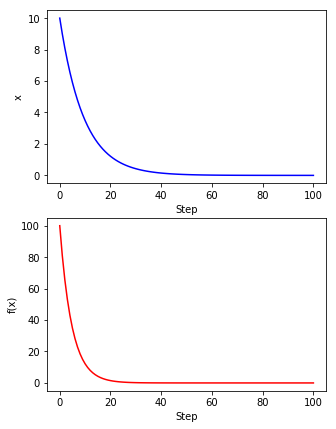

Final value of x: 0.00026561398887587435
Final value of f(x): 7.05507910865531e-08


In [6]:
# An example of minimizing the function f(x) = x^2 with gradient descent
def f(x): return x**2
def grad_f(x): return 2*x # Gradient of f(x), computed by hand

x = 10
learning_rate = 0.05
x_values = [x]
y_values = [f(x)]

for step in range(100):
    x = x - learning_rate * grad_f(x)
    x_values.append(x)
    y_values.append(f(x))
    
plt.figure(figsize=(5, 7))
plt.subplot(2, 1, 1)
plt.plot(range(101), x_values, 'b-')
plt.xlabel('Step')
plt.ylabel('x')

plt.subplot(2, 1, 2)
plt.plot(range(101), y_values, 'r-')
plt.xlabel('Step')
plt.ylabel('f(x)')
plt.show()

print('Final value of x:', x)
print('Final value of f(x):', f(x))

### Aside on local minima 
Gradient descent is only guaranteed to converge to the global minimum of a _convex_ function.
This seems like a problem, since most loss functions we want to minimize are not convex.
However, local minima are very rare in high-dimensional space: for a random function to be at a local minimum in $n$-dimensional space, it needs to curve upwards on _every_ axis, so it has probability $\propto 2^{-n}$.
For neural networks, the vector space of possible parameter values can have millions of parameters.

Instead, we usually care about _saddle points_, where the loss function looks locally flat.
Modern variants of gradient descent like momentum, adagrad, and Adam approach this problem by using more information than just the gradient to make parameter updates.
But, how to handle these points best when training neural networks (and even how much of a problem they are) is still somewhat of an open problem.

# Graph programming in TensorFlow

Python programs that use Tensorflow are divided into two sections: 
 1. Building a computational graph by adding tensors and operations to a graph
 2. Using a `tf.Session` to evaluate tensors or operations by executing subgraphs

## The graph
Your code is written in Python, but most of your program logic will be in a computational graph.
TensorFlow represents this with a `tf.Graph` object.
TensorFlow always has a default `Graph`, and while it does support programs with multiple graphs, this usecase is rare and bug-prone.
As a result, you'll basically never create `Graph`s by hand -- they'll just store your program in the background.
If you do need to access the `Graph` object (for instance, to pass to the `add_graph()` method of a `FileWriter`), use `tf.get_default_graph()`.

## Tensors and operations
To build up a computational graph, you need to add tensors (directed edges) and operations (nodes) to the `Graph`.
Operations are represented by `tf.Operation` objects, and tensors are represented by `tf.Tensor` objects.
Most functions in TensorFlow are actually `tf.Operation` constructors, which:
 - Take zero or more tensors, and possibly some parameters, as input
 - Permanently add a new operation to the `Graph`
 - Add a directed edge from each operation that created an input tensor to the new operation
 - Return a new `tf.Tensor` object (some operations do not return a tensor)

For example (quoting the [official docs on `tf.Operation`](https://www.tensorflow.org/api_docs/python/tf/Operation)), `c = tf.matmul(a, b)` creates an `Operation` of type "MatMul" that takes tensors `a` and `b` as input, and produces `c` as output.
Passing `c` to another operation "wires" the two together.

Always keep in mind that `tf.Tensor` objects are not tensor values, they're _just Python objects you use to build a graph!_
You can only do two things with them: pass them to operations to wire operations together in the graph, or evaluate them with the `run()` method of a `tf.Session` (see below).
Tensors do not have values until a subgraph they're in is actually evaluated.
So printing the `tf.Tensor` object with Python's `print()` will do nothing -- use the `tf.print()` operation instead.

Operations always accept a `name` keyword argument, which will give a name to the operation added to the graph and to the tensor it returns, if applicable.
You should always name your important operations!
It's good documentation for your code, and will make debugging with TensorBoard and tfdbg _infinitely_ easier.
Think of operation naming like commenting: a little thing that will make debugging, maintainence, and development much easier. 

The simplest operation is [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant), which just represents a constant value used in the graph.
But think through how it works internally: calling `tf.constant()` actually adds a "Constant" operation to the graph and returns a tensor, which is still just a placeholder despite taking on the same value every time.
Using this constant tensor means adding a directed edge from the "Constant" operation to wherever the constant tensor is used.
Thinking about the internals in depth like this can prevent bugs, like the common mistake of calling an operation constructor each time you want to use its returned tensor -- this will add the same operation to the graph many times, when in fact you should store its returned tensor as a Python variable and use it to wire the operation's output to many other places.

A very similar operation is [`tf.placeholder`](https://www.tensorflow.org/api_docs/python/tf/placeholder), which takes a data type and a shape to return a single tensor.
This tensor, when evaluated as part of a subgraph, will always error unleess fed (see the next section).
Placeholders are often used for debugging.

Note: almost any time you would use a tensor, you can instead use a ["tensor-like object"](https://www.tensorflow.org/guide/graphs#tensor-like_objects): a numpy `ndarray`, a Python list, or a Python scalar.
This will just act like a constant with the given value.

Note 2: "operation constructors" aren't actually legal Python constructors, but they're wrappers to constructors for subclasses of `tf.Operation` that return different objects

## Sessions and subgraph execution
A `tf.Session` object abstracts the entire context of running code: it owns access to hardware compute and IO devices (both local and remote), contains various settings, and manages access into the TensorFlow runtime (which is language-agnostic), including automatic parallelization.
A session is associated with only one graph, though multiple sessions can be associated with the same graph (and often you use separate sessions for training and inference, for example).
To create a session, call the `tf.Session()` constructor, remembering to call its `close()` method when you are done to free resources.
Or, more conveniently (and Pythonically), use it in a `with` block:
```
with tf.Session() as sess:
    ...
```

Once you have a session, you can finally execute your program by evaluating parts of the graph you've built with the [`run()`](https://www.tensorflow.org/api_docs/python/tf/Session#run) method of a `tf.Session`, which takes:
 - **fetches**: one or more tensors (which will be evaluated into numpy `ndarray`s of numbers) or operations (which will be run)
 - (optional) **feed_dict**: a dictionary of "feeds" mapping from tensor object to tensor value, which will overwrite the value of the tensor during the run; typically used with placeholders, but can overwrite any tensor; great for debugging!
 - (optional) **options**: [advanced options modifying the run](https://www.tensorflow.org/api_docs/python/tf/RunOptions)
 - (optional) **run_metadata**: a `tf.RunMetadata()` object to store information about the run in so it can be visualized later
`run()` then recursively evaluates the operations required to compute each tensor or run each operation, and returns the tensor values (and None for each operation).
Fetches can be passed as any combination of single values, lists, tuples, and dictionaries; values are returned in the same shape.

For example:

In [7]:
a = tf.constant(3)
b = tf.placeholder(tf.int32)
c = a + b

run_metadata = tf.RunMetadata()

with tf.Session() as sess:
    results_1 = sess.run(c, feed_dict={b: 0})
    results_2 = sess.run({'a': a, 'b and c': [b, c]},
                         feed_dict={a: 1, b: -1},
                         run_metadata=run_metadata)

print('results_1:', results_1)
print('results_2:', results_2)

# Note: this sometimes returns ndarrays with single elements
# If this bothers you, you can use np.asscalar

results_1: 3
results_2: {'a': array(1, dtype=int32), 'b and c': [array(-1, dtype=int32), 0]}


## Variables
To train a model, you need parameters that persist changes across multiple runs.
These are represented by [`tf.Variable` objects](https://www.tensorflow.org/guide/variables), which can be treated as a `tf.Tensor`.
You can use the [`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable) constructor, but it's almost always moree convenient to use the [`tf.get_variable()`](https://www.tensorflow.org/api_docs/python/tf/get_variable) wrapper function, which gets an existing variable by string name or creates it if one does not exist.
In addition to a name, a new variable needs a shape and an initializer.

[Initializers](https://www.tensorflow.org/api_docs/python/tf/initializers) determine how a variable's value begins the first time it is used.
What you plan a variable to represent will determine how you want it initialized.
Then, before you run any of the graph code, call `sess.run(tf.global_variables_initializer())` to initialize all variables at once, or `sess.run(my_variable.initializer)` to initialize `my_variable` (less common).

Note that variables persist their value _only within the context of a single session!_
To use variables over multiple sessions, save their values to disk with a Saver (see next lecture).

You can change variables by hand, but usually they're changed with optimizers that use gradient descent (see next section) to find good values automatically.

The `tf.layers` API is a series of operations that contain their own variables.
They help for certain simpler models, but are generally less flexible than managing the variables yourself.
As a result we won't use any operations named like `tf.layers.*`.

It's worth reading the [short official Variables guide](https://www.tensorflow.org/guide/variables).

## Optimizers
[Optimizers](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer) automatically change variables in the graph to find values that minimze certain quantities, usually the loss.

The archetypal optimizer is [`tf.train.GradientDescentOptimizer`](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer), and just about every other optimizer you use will be some variant of it.
Optimizers are just Python objects, created through their constructors with some (optional or mandatory) parameters:
```
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
```
Then, calling the optimizer's [`minimize()`](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#minimize) function, passing in the tensor containing the value to minimize, returns on operation.
When this operation is run within a session, all of the variables in the same graph as the minimization operation are updated by the optimizer according to its optimization algorithm (gradient descent or a variant).
Usually this happens many times in a "training loop."

```
training_op = optimizer.minimize(loss_tensor)
with tf.Session() as sess:
    for training_step in range(1000):
        sess.run(training_op)
```

Note: we haven't actually talked about backpropagation, the algorithm TensorFlow uses to efficiently compute gradients of values in the graph with respect to variables. More on this next week.

## Name scopes and variable scopes
In addition to giving single operations names, you can also use `tf.name_scope()` to give all following operations a common prefix.
This is very helpful to group operations that form a "block" (and you can think of them as forming one, more complex, operation defined in terms of its inputs and outputs), and will also allow you to collapse them into a single node when visualizing the graph (next week).

`tf.variable_scope()` is similar, except it affects the names of variables instead of the names of operations.
You can also pass the keyword phrase `reuse=True` to a `tf.variable_scope()` to get a variable by the given name if it exists; otherwise TensorFlow will just throw an error.

In [8]:
with tf.name_scope('this_is_a_name_scope'):
    print(tf.constant(1))
    print(tf.get_variable('variable_name', shape=(), dtype=tf.int32))
    
with tf.variable_scope('this_is_a_variable_scope'):
    a = tf.get_variable('variable_name', shape=(), dtype=tf.int32)
    print(a)
    
with tf.variable_scope('this_is_a_variable_scope', reuse=True):
    b = tf.get_variable('variable_name', shape=(), dtype=tf.int32)
    print('b is a?', b is a)

Tensor("this_is_a_name_scope/Const:0", shape=(), dtype=int32)
<tf.Variable 'variable_name:0' shape=() dtype=int32_ref>
<tf.Variable 'this_is_a_variable_scope/variable_name:0' shape=() dtype=int32_ref>
b is a? True


# Full program example
Below is an example of performing the minimization of $f(x) = x^2$ from before with TensorFlow.

In [9]:
# Add operations to the default graph
with tf.name_scope('minimize_x_squared'):
    # Create input variable
    x = tf.get_variable('x', shape=(), dtype=tf.float32, 
                        initializer=tf.constant_initializer(10)) 
    
    # Compute f(x) = x^2
    # `tf.pow` takes in two tensors and returns a tensor
    y = tf.pow(x, tf.constant(2.0), name='y')
    
    # Create optimization operator
    optimize_step = tf.train.GradientDescentOptimizer(0.05, name='optimizer').minimize(y)

In [10]:
# Run training
with tf.Session() as sess: # Create a session   
    sess.run(tf.global_variables_initializer()) # Initialize all variables
    
    print('Initial value of x:', sess.run(x))
    print('Initial value of f(x):', sess.run(y))
    
    for step in range(100):
        sess.run(optimize_step)
        
    print('Final value of x:', sess.run(x))
    print('Final value of f(x):', sess.run(y))

Initial value of x: 10.0
Initial value of f(x): 100.0
Final value of x: 0.00026561393
Final value of f(x): 7.0550755e-08


### Deeper graph example
This code creates the computational graph pictured above as a TensorFlow graph, showcasing overloading on arithmetic operators and using placeholders.

In [11]:
with tf.name_scope('example_graph'):
    a = tf.placeholder(tf.float32, (), name='a') # Returns a tensor that must be fed
    b = tf.placeholder(tf.float32, (), name='b')
    c = a + b # This is shorthand for the operator function tf.add(a, b)
    d = b + tf.constant(1.0)
    e = c * d

In [12]:
with tf.Session() as sess:
    print('a =', sess.run(a, feed_dict={a: 1}))
    print('a =', sess.run(a, feed_dict={a: 2}))
    print('e =', sess.run(e, feed_dict={a: 1, b: 2}))

a = 1.0
a = 2.0
e = 9.0


#### Whew! That's all the basics of writing code in TensorFlow. More interesting problems and models to come :)